In [55]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [56]:
data = pd.read_csv("FIFA_excel_edit.csv")

In [57]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [58]:
train_set, test_set = split_train_test(data, 0.3)

In [59]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [60]:
train_set_tar = train_set["Rating"]
train_set_tar.shape

(12311,)

In [61]:
train_set_pred = train_set.drop(columns =["Rating"])
train_set_pred.shape

(12311, 34)

In [62]:
test_set_tar=test_set["Rating"]
test_set_tar.shape

(5275,)

In [63]:
test_set_pred = test_set.drop(columns =["Rating"])
test_set_pred.shape

(5275, 34)

In [64]:
model.fit(train_set_pred,train_set_tar)
model.intercept_

-17.58072780956269

In [65]:
len(model.coef_)

34

In [66]:
MSE = np.mean((train_set_tar-model.predict(train_set_pred))**2)
MSE

0.11050947402128826

In [67]:
MSE = np.mean((test_set_tar-model.predict(test_set_pred))**2)
MSE

0.10824003670786994

In [68]:
r2_score(train_set_tar,model.predict(train_set_pred))

0.9977976445848551

In [69]:
r2_score(test_set_tar,model.predict(test_set_pred))

0.9978294804336787

Text(0.5,1,'Train(blue) vs Test(green)')

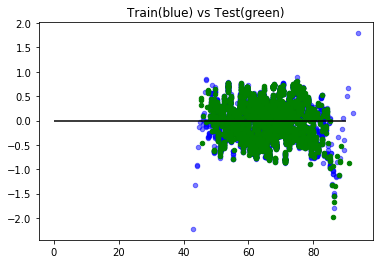

In [70]:
plt.scatter(model.predict(train_set_pred),model.predict(train_set_pred)-train_set_tar,c='b',s=20,alpha=0.5)
plt.scatter(model.predict(test_set_pred),model.predict(test_set_pred)-test_set_tar,c='g',s=20)
plt.hlines(y=0,xmin=0,xmax=90)
plt.title("Train(blue) vs Test(green)")